<a href="https://colab.research.google.com/github/pc11837/Linear-Regression/blob/main/exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Predicting Stock Prices: Develop a time series prediction model to forecast stock prices.
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
a=files.upload()

Saving stock_price_timeseries_dataset.csv to stock_price_timeseries_dataset.csv


In [ ]:
df=pd.read_csv('stock_price_timeseries_dataset.csv')
df.head()

,Date,Stock,Open,High,Low,Close,Volume
0,2020-01-01,AAPL,173.80,174.75,173.68,174.43,8204212
1,2020-01-02,AAPL,176.01,177.59,174.07,177.55,2766891
2,2020-01-03,AAPL,177.57,178.37,176.62,176.71,5721339
3,2020-01-06,AAPL,176.01,177.58,171.33,171.73,9242680
4,2020-01-07,AAPL,171.85,172.20,170.69,170.82,4416664


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6525 non-null   object 
 1   Stock   6525 non-null   object 
 2   Open    6525 non-null   float64
 3   High    6525 non-null   float64
 4   Low     6525 non-null   float64
 5   Close   6525 non-null   float64
 6   Volume  6525 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 357.0+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,6525.000000,6525.000000,6525.000000,6525.000000,6.525000e+03
mean,213.704539,215.506772,211.894846,213.707077,5.482976e+06
std,45.359045,45.346029,45.344026,45.336372,2.604083e+06
min,119.660000,121.480000,117.990000,118.870000,1.000443e+06
25%,180.630000,182.440000,178.860000,180.660000,3.161522e+06
50%,209.960000,211.920000,208.110000,210.260000,5.484982e+06
75%,247.740000,249.510000,245.590000,247.610000,7.713960e+06
max,313.910000,314.910000,309.670000,313.200000,9.997354e+06


In [ ]:
df.isnull().sum()


,0
Date,0
Stock,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
df.describe()


,Open,High,Low,Close,Volume
count,6525.000000,6525.000000,6525.000000,6525.000000,6.525000e+03
mean,213.704539,215.506772,211.894846,213.707077,5.482976e+06
std,45.359045,45.346029,45.344026,45.336372,2.604083e+06
min,119.660000,121.480000,117.990000,118.870000,1.000443e+06
25%,180.630000,182.440000,178.860000,180.660000,3.161522e+06
50%,209.960000,211.920000,208.110000,210.260000,5.484982e+06
75%,247.740000,249.510000,245.590000,247.610000,7.713960e+06
max,313.910000,314.910000,309.670000,313.200000,9.997354e+06


In [ ]:
# The x and y variables will be defined after all preprocessing steps are applied to df.

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(pd.Timestamp.toordinal)#toordinal():It converts each date into a single integer number representing number of days since a fixed reference date.
#https://chatgpt.com/share/6990803e-564c-8008-9700-0eba28681ada

In [ ]:
# Re-load df to ensure 'Stock' column is present and re-apply date conversion before get_dummies
df = pd.read_csv('stock_price_timeseries_dataset.csv')
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(pd.Timestamp.toordinal)

df = pd.get_dummies(df, columns=['Stock'], drop_first=True)

# Define features (x) and target (y) after preprocessing

y = df['Close']
x = df.drop(columns=['Close'])



In [ ]:
# step 3
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.599594406170368
R² Score: 0.9997029331120738


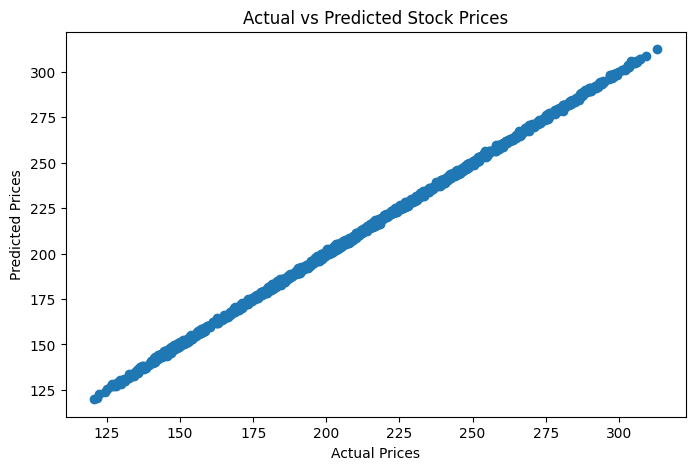

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Stock Prices")
plt.show()


In [ ]:
import os
import pickle
from google.colab import drive
e
drive.mount('/content/drive')

folder_path = "/content/drive/MyDrive/aiml 2026"
os.makedirs(folder_path, exist_ok=True)


model_path = folder_path + "/baba.pkl"

with open(model_path, "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully in aiml 2026 folder as baba.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully in aiml 2026 folder as baba.pkl
